## Question 
Consider the mentioned dataset and apply the hierarchical data-clustering algorithm, to identify the clusters. Write a Python function (without using the scikit-learn library) to do the following:-
</br>
</br>
a. Plot a graph that displays the number of clusters on the x-axis and the Sum of Squared Errors (SSE) on the y-axis.  
</br>
b. Display the proximity matrix using Euclidean distance, Manhattan distance, and Minkowski distance.  
</br>
c. Plot the dendrogram for single, complete, average, centroid, and ward linkage methods.
</br>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist

data = np.array([
    [1, 1],   # p1
    [3, 2],   # p2
    [9, 1],   # p3
    [3, 7],   # p4
    [7, 2],   # p5
    [9, 7],   # p6
    [4, 8],   # p7
    [8, 3],   # p8
    [1, 4]    # p9
])

### ( B )

In [9]:
def proximity_matrices(data):
    euclidean_dist = dist.squareform(dist.pdist(data, metric='euclidean'))
    manhattan_dist = dist.squareform(dist.pdist(data, metric='cityblock'))
    minkowski_dist = dist.squareform(dist.pdist(data, metric='minkowski', p=3))

    euclidean_df = pd.DataFrame(euclidean_dist, columns=[f'p{i+1}' for i in range(len(data))],
                                 index=[f'p{i+1}' for i in range(len(data))])
    manhattan_df = pd.DataFrame(manhattan_dist, columns=[f'p{i+1}' for i in range(len(data))],
                                 index=[f'p{i+1}' for i in range(len(data))])
    minkowski_df = pd.DataFrame(minkowski_dist, columns=[f'p{i+1}' for i in range(len(data))],
                                 index=[f'p{i+1}' for i in range(len(data))])

    return euclidean_df, manhattan_df, minkowski_df

euclidean_df, manhattan_df, minkowski_df = proximity_matrices(data)

print("Euclidean Distance Matrix:\n", euclidean_df)
print("\nManhattan Distance Matrix:\n", manhattan_df)
print("\nMinkowski Distance Matrix:\n", minkowski_df)

Euclidean Distance Matrix:
            p1        p2        p3        p4        p5         p6        p7  \
p1   0.000000  2.236068  8.000000  6.324555  6.082763  10.000000  7.615773   
p2   2.236068  0.000000  6.082763  5.000000  4.000000   7.810250  6.082763   
p3   8.000000  6.082763  0.000000  8.485281  2.236068   6.000000  8.602325   
p4   6.324555  5.000000  8.485281  0.000000  6.403124   6.000000  1.414214   
p5   6.082763  4.000000  2.236068  6.403124  0.000000   5.385165  6.708204   
p6  10.000000  7.810250  6.000000  6.000000  5.385165   0.000000  5.099020   
p7   7.615773  6.082763  8.602325  1.414214  6.708204   5.099020  0.000000   
p8   7.280110  5.099020  2.236068  6.403124  1.414214   4.123106  6.403124   
p9   3.000000  2.828427  8.544004  3.605551  6.324555   8.544004  5.000000   

          p8        p9  
p1  7.280110  3.000000  
p2  5.099020  2.828427  
p3  2.236068  8.544004  
p4  6.403124  3.605551  
p5  1.414214  6.324555  
p6  4.123106  8.544004  
p7  6.403124  5.

### ( A )

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


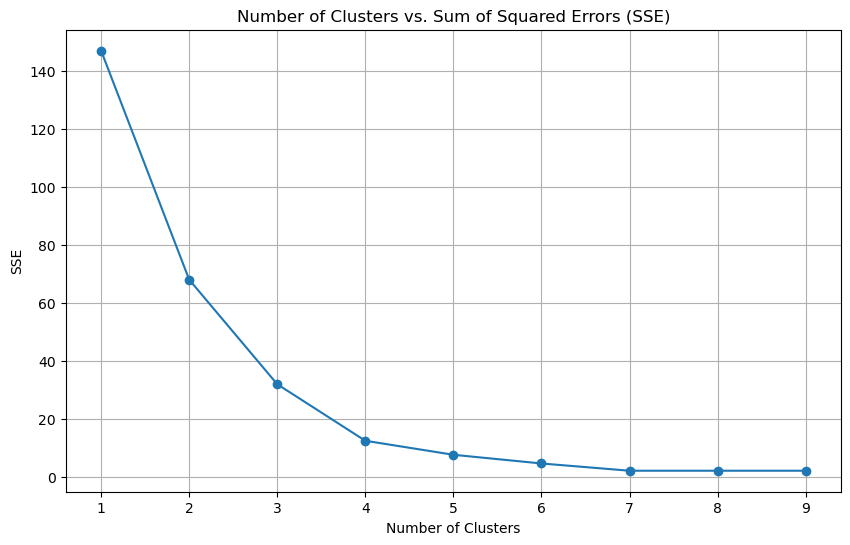

In [10]:
def calculate_sse(data, clusters):
    sse = 0
    for cluster in clusters:
        cluster_points = data[cluster]
        cluster_center = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    return sse

def plot_sse(data):
    sse_values = []
    for k in range(1, len(data) + 1):
        linkage_matrix = sch.linkage(data, method='ward')
        clusters = sch.fcluster(linkage_matrix, k, criterion='maxclust')
        sse = calculate_sse(data, [np.where(clusters == i)[0] for i in range(1, k + 1)])
        sse_values.append(sse)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(data) + 1), sse_values, marker='o')
    plt.title('Number of Clusters vs. Sum of Squared Errors (SSE)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.grid(True)
    plt.show()

plot_sse(data)


### ( C )

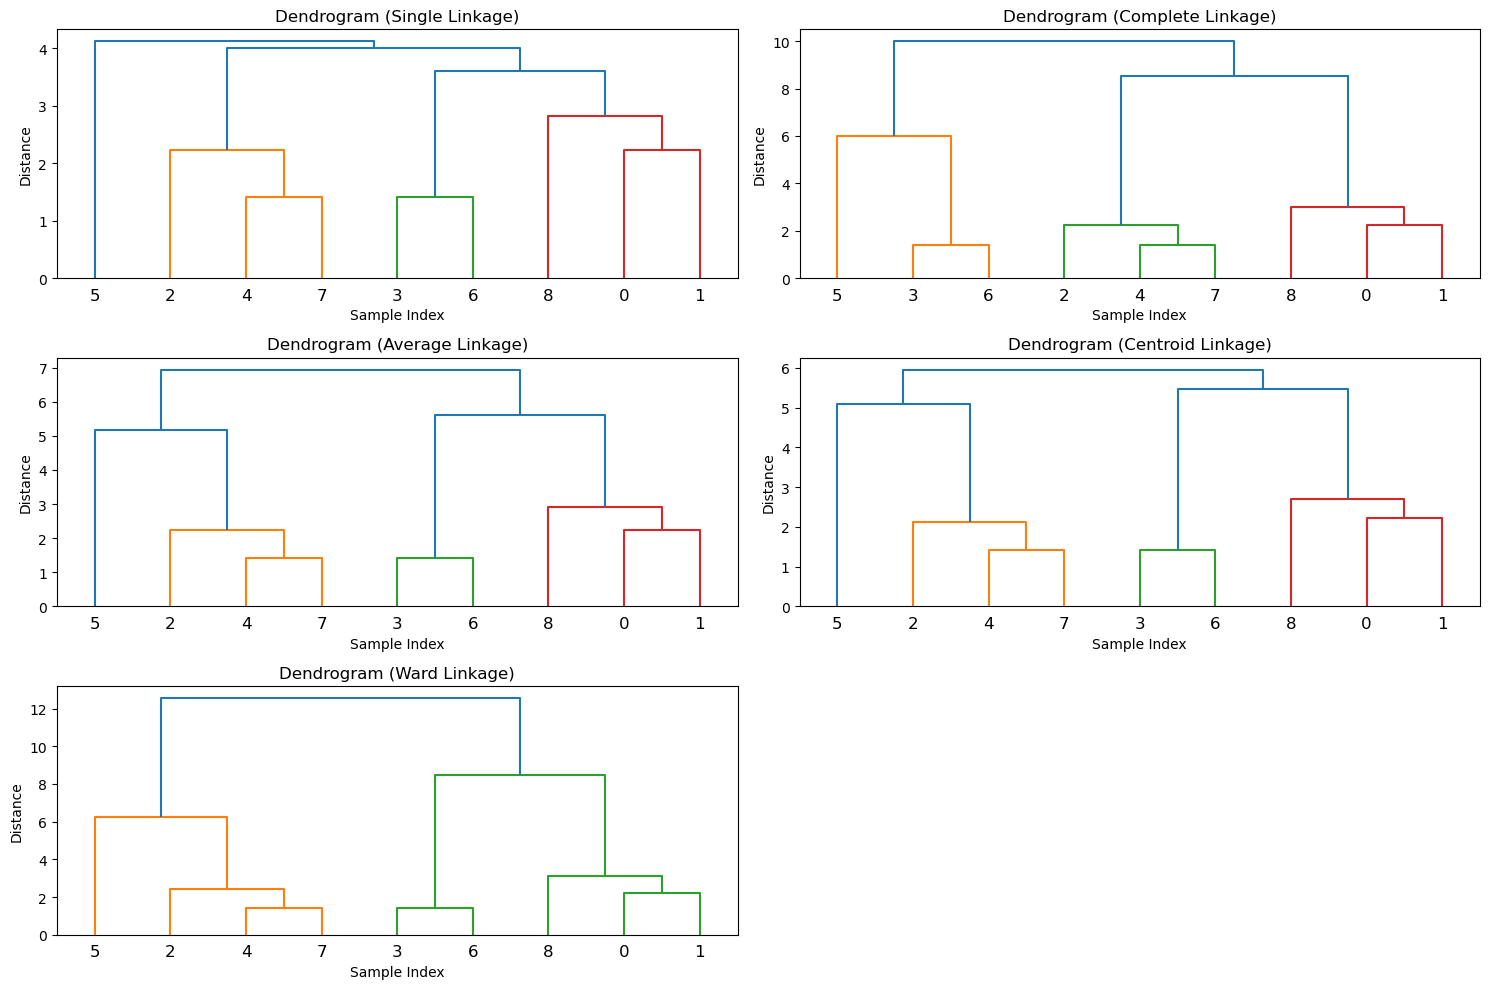

In [11]:
def plot_dendrogram(data):
    methods = ['single', 'complete', 'average', 'centroid', 'ward']
    
    plt.figure(figsize=(15, 10))
    for i, method in enumerate(methods):
        plt.subplot(3, 2, i + 1)
        linkage_matrix = sch.linkage(data, method=method)
        sch.dendrogram(linkage_matrix)
        plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        
    plt.tight_layout()
    plt.show()

plot_dendrogram(data)
